In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [3]:
df=pd.read_csv('haberman.csv')

In [5]:
#Taking a look at haberman dataset
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
#No no of records and features
df.shape

(306, 4)

In [12]:
#Check if any null entries are present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.6 KB


**Null entries not present in any of the columns**

<AxesSubplot:>

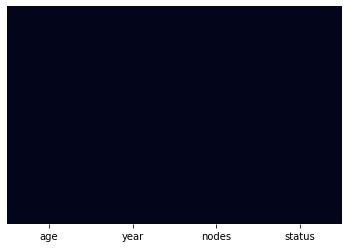

In [14]:
#Analysing Null values with Seaborn Heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

**Confirming the above conclusion(No NULL Values are present in any of the features) with help of a heatplot.**

In [110]:
#Getting a stats of the data mean,standard deviation, 25th percentile and 50th percentile
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**The age of patients in this data is between 30-83 with avg age around 52**

In [16]:
#Different classes of status
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

**Two classes 1&2 are found in given dataset. Also no of datapoints for class 1 is 225 and that if class 2 is 81 so the dataset seems to be imbalanced.**

**Objective:** Here our objective is to analyse all the features using different matrix & plot and identify the important features which can help us to correctly define status of any future patient based on the learnings from the current data.

## Bivariate analysis

In [23]:
#Scatter Plot for Bivariate Analysis To identify the most important features

Text(0.5, 1.0, 'Distribution Of Age vs No Of Nodes')

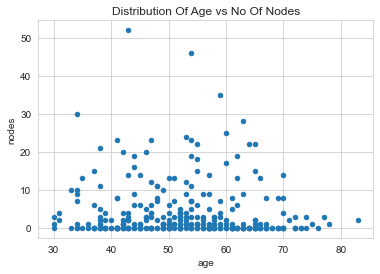

In [106]:
df.plot(kind='scatter',x='age',y='nodes').set_title('Distribution Of Age vs No Of Nodes')

Text(0.5, 1.0, 'Distribution Of Year of operation vs No Of Nodes')

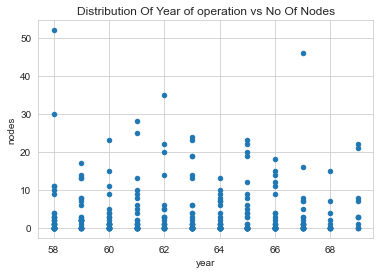

In [107]:
df.plot(kind='scatter',x='year',y='nodes').set_title('Distribution Of Year of operation vs No Of Nodes')

Text(0.5, 1.0, 'Distribution Of Age vs Year of Operation')

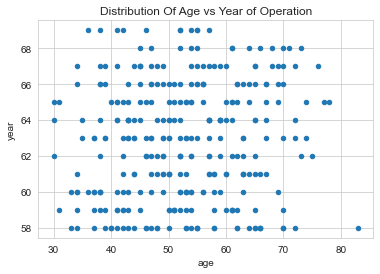

In [105]:
df.plot(kind='scatter',x='age',y='year').set_title('Distribution Of Age vs Year of Operation')

**The above scatter plot is not giving a clear view, lets color datapoints based on status to get a clear view**

Text(0.5, 1.0, 'Distribution Of Year of operation vs No Of Nodes')

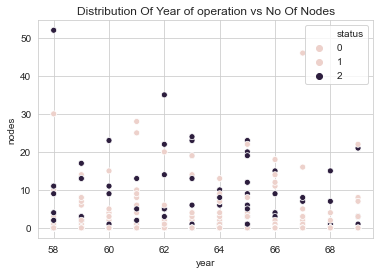

In [104]:
sns.scatterplot('year','nodes',hue='status',data=df).set_title('Distribution Of Year of operation vs No Of Nodes')

Text(0.5, 1.0, 'Distribution Of Age vs No Of Nodes')

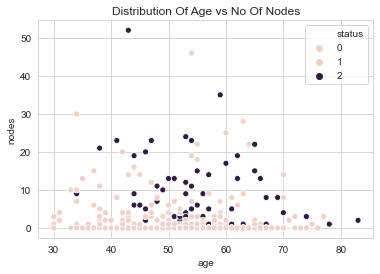

In [108]:
sns.scatterplot('age','nodes',hue='status',data=df).set_title('Distribution Of Age vs No Of Nodes')

Text(0.5, 1.0, 'Distribution Of Year Of Operation vs Age')

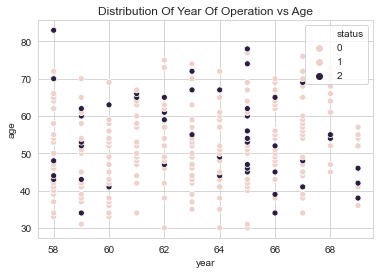

In [109]:
sns.scatterplot('year','age',hue='status',data=df).set_title('Distribution Of Year Of Operation vs Age')

**Seems like year of operation and no of nodes can give a clear idea than other features**

In [41]:
#Lets check the same using pairplot

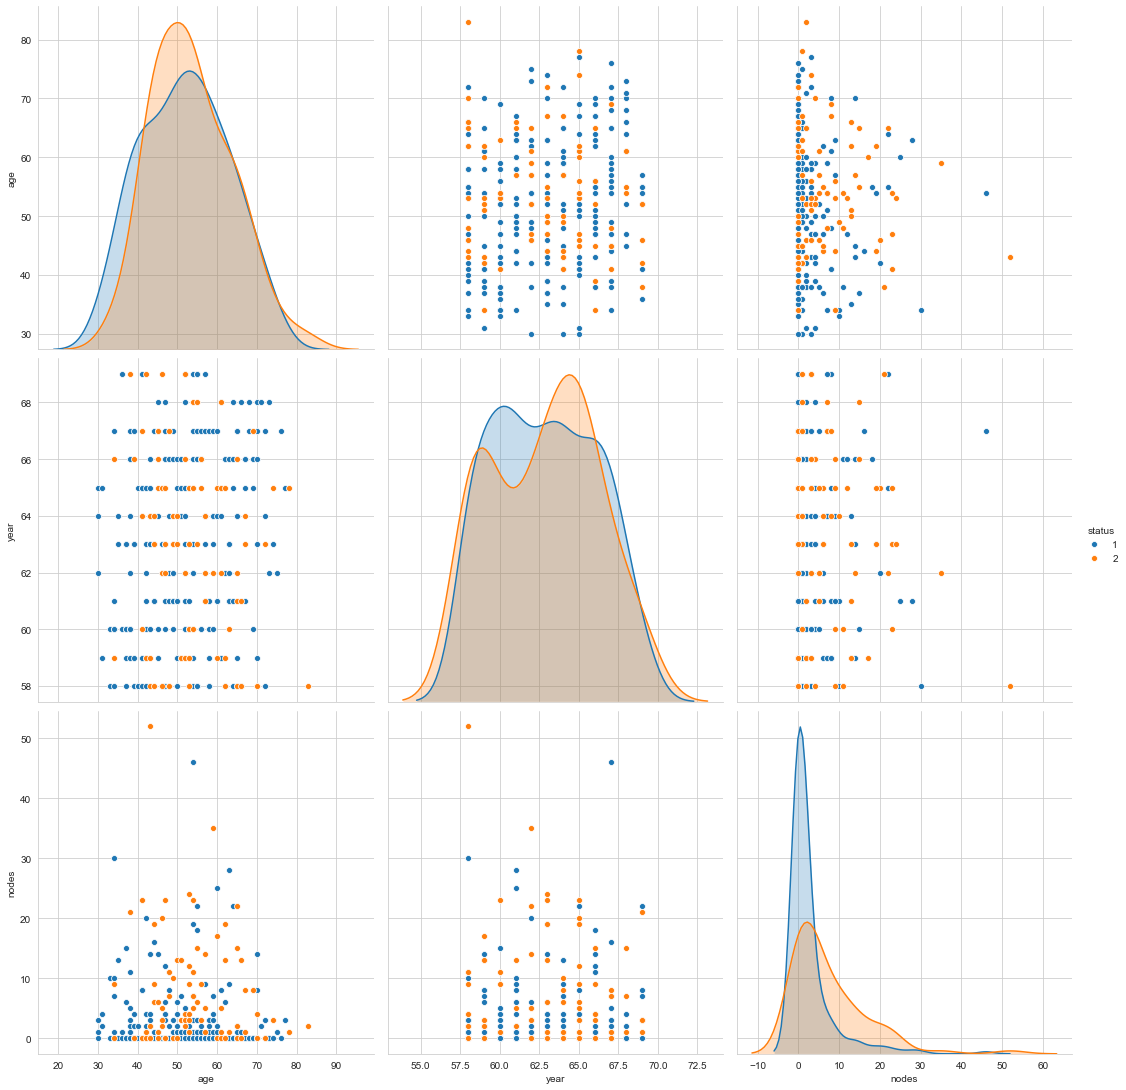

In [44]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="status", height=5);
plt.show()

**The above stated observation can be verified from above pairplot**

## Univariate Analysis

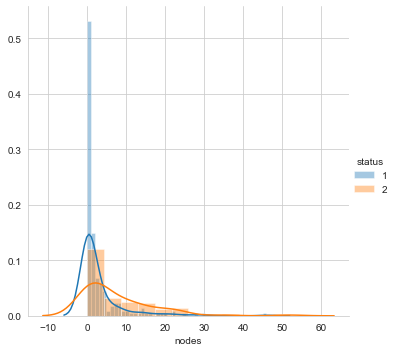

In [46]:
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "nodes").add_legend();
plt.show();

**Chance of survival is more if no of nodes < 10**

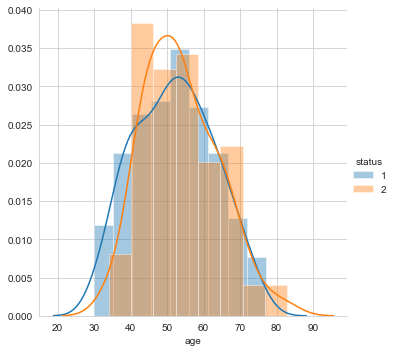

In [47]:
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "age").add_legend();
plt.show();
#Features overlapping too much nothing much can be infered from this plot.

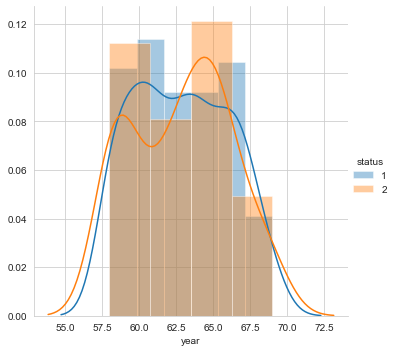

In [48]:
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "year").add_legend();
plt.show();
#Features overlapping too much nothing much can be infered from this plot.

### PDF & CDF

In [126]:
counts, bin_edges = np.histogram(df['nodes'], bins=10, density = True)

In [127]:
#Calculating pdf for Nodes Feature
pdf=counts/sum(counts)
print('PDF(Nodes): ',pdf)

PDF(Nodes):  [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]


In [128]:
#Calculating CDF For the same
cdf=np.cumsum(pdf)
print('CDF(Nodes): ',cdf)

CDF(Nodes):  [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


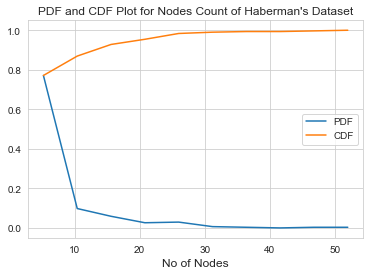

In [129]:
node_pdf=copy.deepcopy(pdf)
node_cdf=copy.deepcopy(cdf)
node_bins=copy.deepcopy(bin_edges)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title('PDF and CDF Plot for Nodes Count of Haberman\'s Dataset')
plt.xlabel('No of Nodes',fontsize='12')
plt.gca().legend(('PDF','CDF'))
plt.show()

PDF(Nodes):  [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF(Nodes):  [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


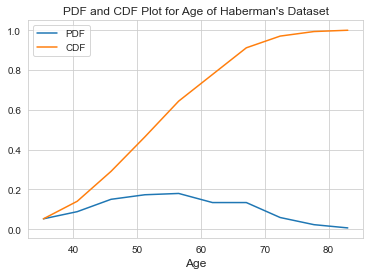

In [130]:
#PDF and CDF for age feature
counts, bin_edges = np.histogram(df['age'], bins=10, density = True)
pdf=counts/sum(counts)
print('PDF(Nodes): ',pdf)
cdf=np.cumsum(pdf)
print('CDF(Nodes): ',cdf)
age_pdf=copy.deepcopy(pdf)
age_cdf=copy.deepcopy(cdf)
age_bins=copy.deepcopy(bin_edges)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title('PDF and CDF Plot for Age of Haberman\'s Dataset')
plt.xlabel('Age',fontsize='12')
plt.gca().legend(('PDF','CDF'))
plt.show()

**Most of the patients (approx 75%) are below 60 years of age**

PDF(Nodes):  [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF(Nodes):  [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]


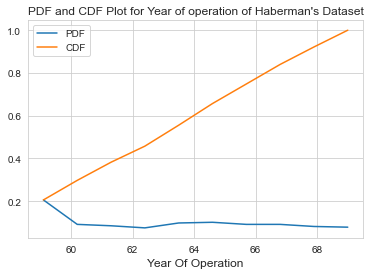

In [131]:
#PDF and CDF for year feature
counts, bin_edges = np.histogram(df['year'], bins=10, density = True)
pdf=counts/sum(counts)
print('PDF(Nodes): ',pdf)
cdf=np.cumsum(pdf)
print('CDF(Nodes): ',cdf)
year_pdf=copy.deepcopy(pdf)
year_cdf=copy.deepcopy(cdf)
year_bins=copy.deepcopy(bin_edges)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title('PDF and CDF Plot for Year of operation of Haberman\'s Dataset')
plt.xlabel('Year Of Operation',fontsize='12')
plt.gca().legend(('PDF','CDF'))
plt.show()

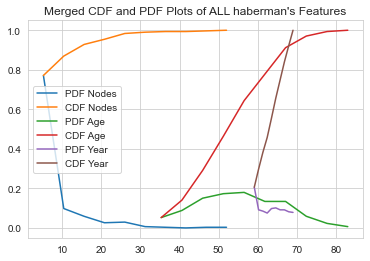

In [134]:
plt.plot(node_bins[1:],node_pdf)
plt.plot(node_bins[1:],node_cdf)
plt.plot(age_bins[1:],age_pdf)
plt.plot(age_bins[1:],age_cdf)
plt.plot(year_bins[1:],year_pdf)
plt.plot(year_bins[1:],year_cdf)
plt.title('Merged CDF and PDF Plots of ALL haberman\'s Features')
plt.gca().legend(('PDF Nodes','CDF Nodes','PDF Age','CDF Age','PDF Year','CDF Year'))
plt.show()

## Violen/Box Plots

Text(0.5, 1.0, 'Distribution of Age for Different Status')

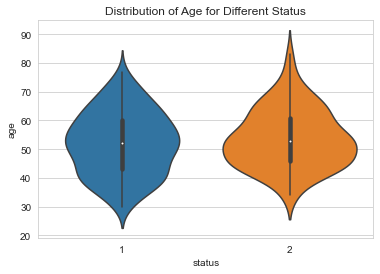

In [82]:
#Box and Violen Plot for 'age' feature.
sns.violinplot('status','age',data=df).set_title('Distribution of Age for Different Status')

Text(0.5, 1.0, 'Distribution of Age for Different Status')

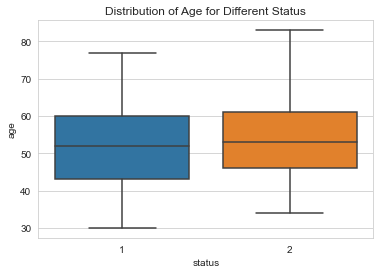

In [83]:
sns.boxplot('status','age',data=df).set_title('Distribution of Age for Different Status')

**Patients with lesser age have survied more**

Text(0.5, 1.0, 'Distribution of Year Of Operation for Different Status')

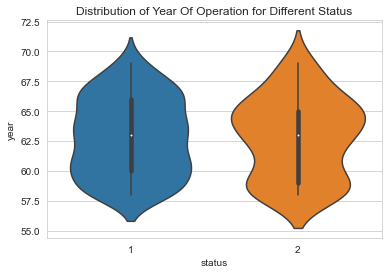

In [84]:
#Box and Violen Plot for 'year' feature.
sns.violinplot('status','year',data=df).set_title('Distribution of Year Of Operation for Different Status')

Text(0.5, 1.0, 'Distribution of Year Of Operation for Different Status')

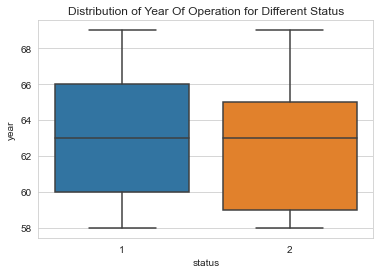

In [85]:
sns.boxplot('status','year',data=df).set_title('Distribution of Year Of Operation for Different Status')

**The chances of survival have increased over the years**

Text(0.5, 1.0, 'Distribution of No. of Nodes for Different Status')

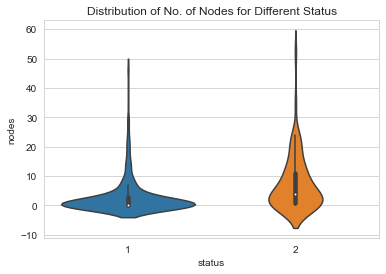

In [86]:
#Box and Violen Plot for 'nodes' feature.
sns.violinplot('status','nodes',data=df).set_title('Distribution of No. of Nodes for Different Status')

Text(0.5, 1.0, 'Distribution of No. of Nodes for Different Status')

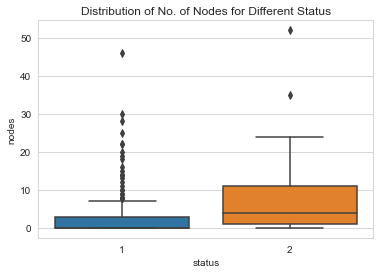

In [87]:
sns.boxplot('status','nodes',data=df).set_title('Distribution of No. of Nodes for Different Status')

**Lesser the nodes in a patient greater is the chance of its survival**

## Conclusion:

1. Null values are not present inside the data.
2. The age of patients in the data is between 30-83 with a mean of around 52.
3. The data seems to imbalanced as more data(255) is present for the once survived and fewer data points(81) for the once not survived.
4. Patients with lesser age have survied more.
5. The chances of survival have increased over the years.
6. Lesser the nodes in a patient greater is the chance of its survival.
7. year of operation and no of nodes are the important features which can help to better analyze data.